In [38]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
import os
from PIL import Image
import random

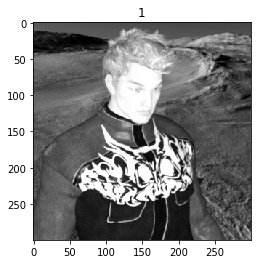

In [112]:
def readtrain():
    datas = []
    labels = []
    files = os.listdir("train")
    for file in files:
        if "horse" in file:
            label = 0
        else:
            label = 1
        with open(os.path.join("train/",file), "rb") as f:
            img = Image.open(f).convert("L")
        img = np.asarray(img)
        datas.append(img)
        labels.append(label)
    return datas, labels
btrains, blabels = readtrain()
plt.imshow(btrains[-1], cmap="gray")
plt.title(blabels[-1])
plt.show()

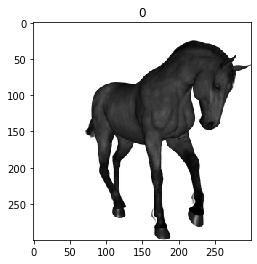

In [113]:
def readtest():
    datas = []
    labels = []
    files = os.listdir("validation")
    for file in files:
        if "horse" in file:
            label = 0
        else:
            label = 1
        with open(os.path.join("validation/",file), "rb") as f:
            img = Image.open(f).convert("L")
        img = np.asarray(img)
        datas.append(img)
        labels.append(label)
    return np.asarray(datas), np.asarray(labels)
t_tests, t_labels = readtest()
plt.imshow(t_tests[0], cmap="gray")
plt.title(t_labels[0])
plt.show()

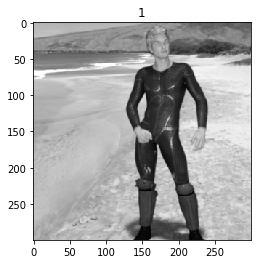

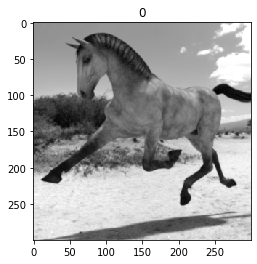

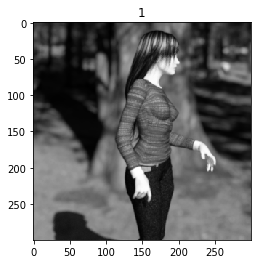

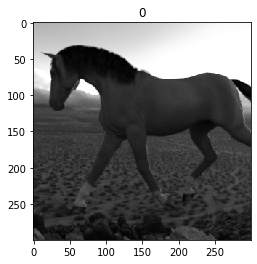

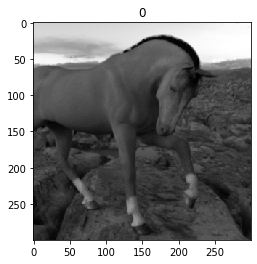

In [114]:
train = []
label = []
while len(btrains) != 0 and len(blabels) != 0:
    index = random.randint(0, len(blabels)-1)
    train.append(btrains.pop(index))
    label.append(blabels.pop(index))
for i in range(5):
    plt.imshow(train[i], cmap="gray")
    plt.title(label[i])
    plt.show()

In [121]:
train = np.asarray(train)
label = np.asarray(label)
train = train/225.0
class_names = ["horse", "human"]
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(300,300)),
    keras.layers.Dense(128,activation="relu"),
    # keras.layers.Dense(128,activation="relu"),
    keras.layers.Dense(2,activation="softmax")
    ])
model.compile(optimizer="adam",loss="sparse_categorical_crossentropy",metrics=["accuracy"])
model.fit(train,label,epochs=15)
test, t_label = readtest()
test_loss, test_acc = model.evaluate(test,t_label)
print("The test accuracy", test_acc)
model.save("hvm.h5")

Train on 1027 samples
Epoch 1/15
1027/1027 [==============================] - 1s 1ms/sample - loss: 0.6930 - accuracy: 0.5112
Epoch 2/15
1027/1027 [==============================] - 1s 1ms/sample - loss: 0.6920 - accuracy: 0.5131
Epoch 3/15
1027/1027 [==============================] - 1s 1ms/sample - loss: 0.6908 - accuracy: 0.5131
Epoch 4/15
1027/1027 [==============================] - 1s 1ms/sample - loss: 0.6892 - accuracy: 0.5131
Epoch 5/15
1027/1027 [==============================] - 1s 1ms/sample - loss: 0.6872 - accuracy: 0.5161
Epoch 6/15
1027/1027 [==============================] - 1s 1ms/sample - loss: 0.6845 - accuracy: 0.5161
Epoch 7/15
1027/1027 [==============================] - 1s 1ms/sample - loss: 0.6814 - accuracy: 0.5648
Epoch 8/15
1027/1027 [==============================] - 1s 1ms/sample - loss: 0.6765 - accuracy: 0.5735
Epoch 9/15
1027/1027 [==============================] - 1s 1ms/sample - loss: 0.6714 - accuracy: 0.5774
Epoch 10/15
1027/1027 [===================

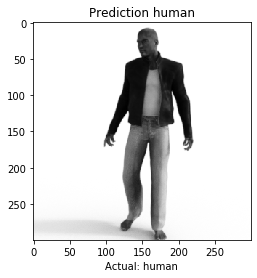

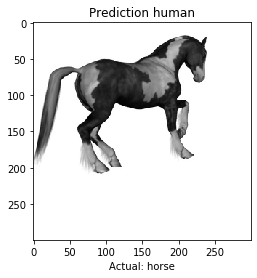

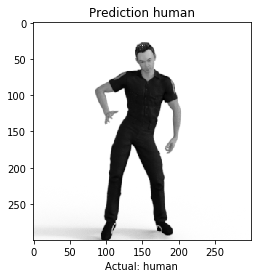

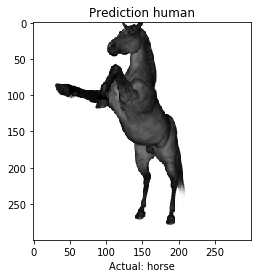

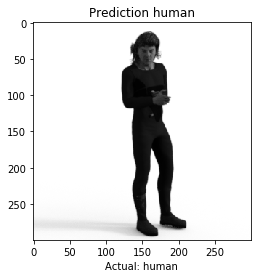

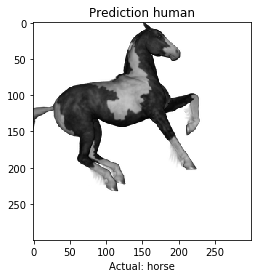

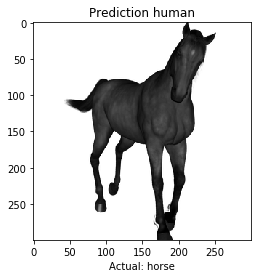

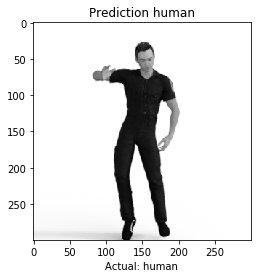

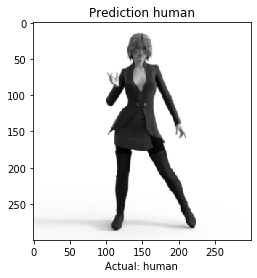

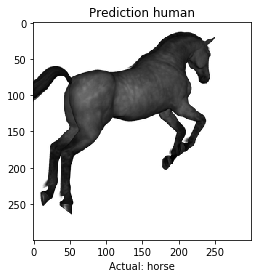

In [127]:
prediction = model.predict(test)
for i in range(10):
    index = random.randint(0,len(test)-1)
    plt.grid(False)
    plt.imshow(test[index],cmap="gray")
    plt.xlabel("Actual: " + class_names[t_label[index]])
    plt.title("Prediction " + class_names[np.argmax(prediction[index])])
    plt.show()